# Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\hp\Desktop\Projects\Data-Projects\smartphones.csv')

In [7]:
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [11]:
data.shape

(980, 26)

In [15]:
data.tail()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
975,motorola,Motorola Moto Edge S30 Pro,34990,83.0,True,False,False,snapdragon,8.0,3.00,...,120,3,1.0,android,64.0,16.0,0,NaN,1080,2460
976,honor,Honor X8 5G,14990,75.0,True,False,False,snapdragon,8.0,2.20,...,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
977,poco,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,True,True,True,dimensity,8.0,2.85,...,144,3,1.0,android,64.0,16.0,0,NaN,1080,2460
978,motorola,Motorola Moto G91 5G,19990,80.0,True,True,False,snapdragon,8.0,2.20,...,60,3,1.0,android,108.0,32.0,1,1024.0,1080,2400
979,samsung,Samsung Galaxy M52s 5G,24990,74.0,True,False,False,NaN,8.0,NaN,...,60,3,1.0,android,64.0,32.0,1,1024.0,1080,2400


In [17]:
data.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [19]:
data.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [25]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [29]:
nu=data.isnull().sum()
nu[nu>0]

rating                  101
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging           211
num_front_cameras         4
os                       14
primary_camera_front      5
extended_upto           480
dtype: int64

<Axes: >

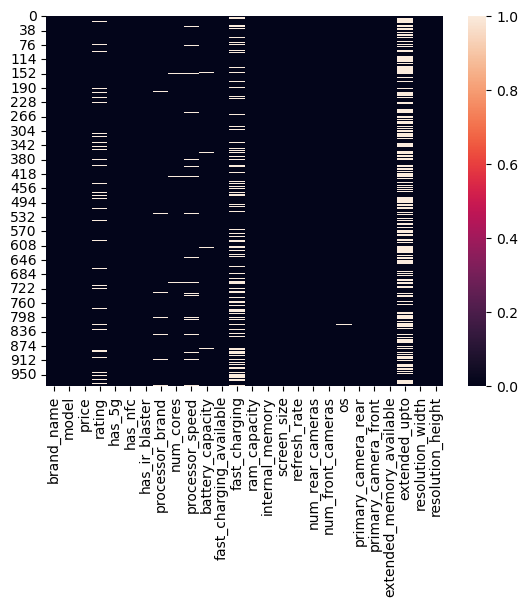

In [31]:
sns.heatmap(data.isnull())

In [35]:
data.duplicated().sum()

0

In [37]:
la=LabelEncoder()

In [41]:
obj=data.select_dtypes(include='object')
non_obj=data.select_dtypes(exclude='object')

In [43]:
for i in range(0,obj.shape[1]):
    obj.iloc[:,i]=la.fit_transform(obj.iloc[:,i])
    

In [45]:
obj

,brand_name,model,processor_brand,os
0,29,307,9,0
1,29,327,9,0
2,36,532,2,0
3,25,198,9,0
4,33,415,1,0
...,...,...,...,...
975,25,180,9,0
976,10,87,9,0
977,32,380,1,0
978,25,205,9,0


In [47]:
obj=obj.astype('int')

In [51]:
df=pd.concat([obj,non_obj],axis=1)

In [53]:
data=df.interpolate(method='linear')
df

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,29,307,9,0,54999,89.0,True,True,False,8.0,...,6.70,120,3,1.0,50.0,16.0,0,NaN,1440,3216
1,29,327,9,0,19989,81.0,True,False,False,8.0,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,36,532,2,0,16499,75.0,True,False,False,8.0,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
3,25,198,9,0,14999,81.0,True,False,False,8.0,...,6.55,120,3,1.0,50.0,16.0,1,1024.0,1080,2400
4,33,415,1,0,24999,82.0,True,False,False,8.0,...,6.70,120,3,1.0,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,25,180,9,0,34990,83.0,True,False,False,8.0,...,6.67,120,3,1.0,64.0,16.0,0,NaN,1080,2460
976,10,87,9,0,14990,75.0,True,False,False,8.0,...,6.50,60,3,1.0,48.0,8.0,1,1024.0,720,1600
977,32,380,1,0,28990,85.0,True,True,True,8.0,...,6.60,144,3,1.0,64.0,16.0,0,NaN,1080,2460
978,25,205,9,0,19990,80.0,True,True,False,8.0,...,6.80,60,3,1.0,108.0,32.0,1,1024.0,1080,2400


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    int32  
 1   model                      980 non-null    int32  
 2   processor_brand            980 non-null    int32  
 3   os                         980 non-null    int32  
 4   price                      980 non-null    int64  
 5   rating                     980 non-null    float64
 6   has_5g                     980 non-null    bool   
 7   has_nfc                    980 non-null    bool   
 8   has_ir_blaster             980 non-null    bool   
 9   num_cores                  980 non-null    float64
 10  processor_speed            980 non-null    float64
 11  battery_capacity           980 non-null    float64
 12  fast_charging_available    980 non-null    int64  
 13  fast_charging              980 non-null    float64

In [65]:
data=data.drop('extended_upto',axis=1)

<Axes: >

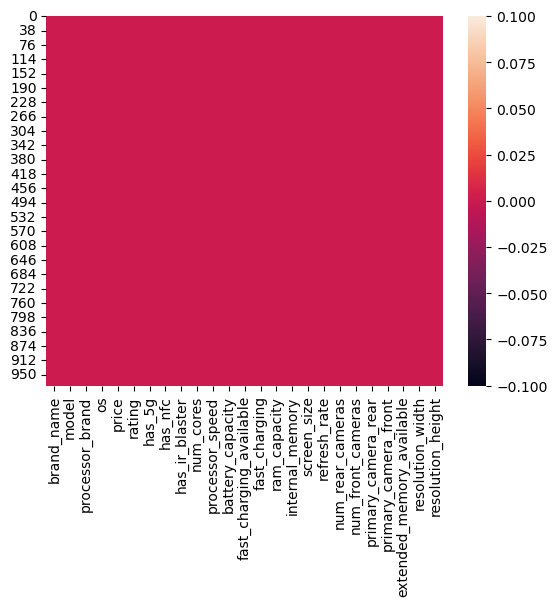

In [67]:
sns.heatmap(data.isnull())

In [75]:
data.shape

(980, 25)

In [73]:
data.isnull().sum()

brand_name                   0
model                        0
processor_brand              0
os                           0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

In [77]:
data.corr()

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
brand_name,1.000000,0.720250,0.063209,-0.370642,-0.216164,-0.006019,-0.097018,-0.266482,0.301223,0.346773,...,-0.185743,0.216425,-0.026999,0.159188,0.037035,0.147186,0.114578,0.255908,-0.031460,0.001663
model,0.720250,1.000000,0.081825,-0.296911,-0.144164,0.003502,-0.047514,-0.246643,0.389721,0.151867,...,-0.122725,0.156439,0.015302,0.110675,0.014868,0.088749,0.025448,0.135313,0.034851,0.017628
processor_brand,0.063209,0.081825,1.000000,-0.112111,-0.066138,-0.057934,-0.203276,-0.060670,-0.047225,0.029932,...,-0.108606,0.092640,0.033119,0.011166,0.013149,0.024765,-0.012743,0.078123,-0.002615,-0.088248
os,-0.370642,-0.296911,-0.112111,1.000000,0.348308,0.073297,0.064838,0.205012,-0.035500,-0.211161,...,0.215187,-0.030943,0.004236,-0.065105,0.023049,-0.087213,-0.016184,-0.256787,0.108976,0.057702
price,-0.216164,-0.144164,-0.066138,0.348308,1.000000,0.260383,0.305066,0.470951,-0.015807,-0.051701,...,0.557168,0.113253,0.244115,0.125330,0.111685,0.092095,0.159614,-0.448628,0.340592,0.353578
rating,-0.006019,0.003502,-0.057934,0.073297,0.260383,1.000000,0.566226,0.448352,0.145014,0.137257,...,0.405130,0.217188,0.574266,0.456663,0.093114,0.475950,0.523919,-0.398298,0.379401,0.588983
has_5g,-0.097018,-0.047514,-0.203276,0.064838,0.305066,0.566226,1.000000,0.481702,0.105542,0.136454,...,0.403837,0.230598,0.611794,0.206512,0.057674,0.347918,0.355829,-0.507752,0.301828,0.504365
has_nfc,-0.266482,-0.246643,-0.060670,0.205012,0.470951,0.448352,0.481702,1.000000,-0.032541,0.024480,...,0.413071,0.103099,0.410777,0.166299,0.065983,0.131004,0.281720,-0.564380,0.342789,0.430081
has_ir_blaster,0.301223,0.389721,-0.047225,-0.035500,-0.015807,0.145014,0.105542,-0.032541,1.000000,0.120332,...,0.030789,0.140809,0.178378,0.198043,-0.011516,0.243608,0.009616,-0.041676,0.155688,0.202746
num_cores,0.346773,0.151867,0.029932,-0.211161,-0.051701,0.137257,0.136454,0.024480,0.120332,1.000000,...,0.043869,0.383138,0.228579,0.340389,0.047749,0.310557,0.216435,0.073997,0.136864,0.264532


In [115]:
data.head()

,brand_name,model,processor_brand,os,price,rating,has_5g,has_nfc,has_ir_blaster,num_cores,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,29,307,9,0,54999,89.0,True,True,False,8.0,...,256.0,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,29,327,9,0,19989,81.0,True,False,False,8.0,...,128.0,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,36,532,2,0,16499,75.0,True,False,False,8.0,...,64.0,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,25,198,9,0,14999,81.0,True,False,False,8.0,...,128.0,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,33,415,1,0,24999,82.0,True,False,False,8.0,...,128.0,6.70,120,3,1.0,108.0,16.0,0,1080,2412


In [131]:
la=LabelEncoder()

In [133]:
bol=df.select_dtypes(include='bool')
non_bol=df.select_dtypes(exclude='bool')
for i in range(0,bol.shape[1]):
    bol.iloc[:,i]=la.fit_transform(bol.iloc[:,i])

In [135]:
bol=bol.astype('int')
df=pd.concat([bol,non_bol],axis=1)

In [137]:
data=df.interpolate(method='linear')
df

,has_5g,has_nfc,has_ir_blaster,brand_name,model,processor_brand,os,price,rating,num_cores,...,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,1,1,0,29,307,9,0,54999,89.0,8.0,...,6.70,120,3,1.0,50.0,16.0,0,NaN,1440,3216
1,1,0,0,29,327,9,0,19989,81.0,8.0,...,6.59,120,3,1.0,64.0,16.0,1,1024.0,1080,2412
2,1,0,0,36,532,2,0,16499,75.0,8.0,...,6.60,90,3,1.0,50.0,13.0,1,1024.0,1080,2408
3,1,0,0,25,198,9,0,14999,81.0,8.0,...,6.55,120,3,1.0,50.0,16.0,1,1024.0,1080,2400
4,1,0,0,33,415,1,0,24999,82.0,8.0,...,6.70,120,3,1.0,108.0,16.0,0,NaN,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,1,0,0,25,180,9,0,34990,83.0,8.0,...,6.67,120,3,1.0,64.0,16.0,0,NaN,1080,2460
976,1,0,0,10,87,9,0,14990,75.0,8.0,...,6.50,60,3,1.0,48.0,8.0,1,1024.0,720,1600
977,1,1,1,32,380,1,0,28990,85.0,8.0,...,6.60,144,3,1.0,64.0,16.0,0,NaN,1080,2460
978,1,1,0,25,205,9,0,19990,80.0,8.0,...,6.80,60,3,1.0,108.0,32.0,1,1024.0,1080,2400


In [157]:
data=data.drop('extended_upto',axis=1)

In [159]:
data.head()

,has_5g,has_nfc,has_ir_blaster,brand_name,model,processor_brand,os,price,rating,num_cores,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_width,resolution_height
0,1,1,0,29,307,9,0,54999,89.0,8.0,...,256.0,6.70,120,3,1.0,50.0,16.0,0,1440,3216
1,1,0,0,29,327,9,0,19989,81.0,8.0,...,128.0,6.59,120,3,1.0,64.0,16.0,1,1080,2412
2,1,0,0,36,532,2,0,16499,75.0,8.0,...,64.0,6.60,90,3,1.0,50.0,13.0,1,1080,2408
3,1,0,0,25,198,9,0,14999,81.0,8.0,...,128.0,6.55,120,3,1.0,50.0,16.0,1,1080,2400
4,1,0,0,33,415,1,0,24999,82.0,8.0,...,128.0,6.70,120,3,1.0,108.0,16.0,0,1080,2412


# Create Model

In [161]:
x=data.drop(['has_5g'],axis=1)
y=data['has_5g']

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [165]:
model1=RandomForestClassifier()
model2=DecisionTreeClassifier()
model3=GradientBoostingClassifier()
model4=KNeighborsClassifier()
model5=GaussianNB()
model6=XGBRegressor()

In [167]:
Algorithm=['RandomForestClassifier','DecisionTreeClassifier','GradientBoostingClassifier','KNeighborsClassifier','GaussianNB','XGBRegressor']
R2=[]
RMSE=[]

In [169]:
def models(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    rmse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score=model.score(x_test,y_test)
    print(f"the score of model is :{score}")

In [171]:
models(model1)
models(model2)  
models(model3)
models(model4)  
models(model5)
models(model6)

the score of model is :0.9438775510204082
the score of model is :0.8979591836734694
the score of model is :0.9540816326530612
the score of model is :0.8061224489795918
the score of model is :0.8010204081632653
the score of model is :0.8529320722785325


In [173]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_score':R2,'Rmse':RMSE})
df

,Algorithm,R2_score,Rmse
0,RandomForestClassifier,0.775136,0.236902
1,DecisionTreeClassifier,0.591156,0.319438
2,GradientBoostingClassifier,0.816020,0.214286
3,KNeighborsClassifier,0.223196,0.440315
4,GaussianNB,0.202753,0.446071
5,XGBRegressor,0.852932,0.191587


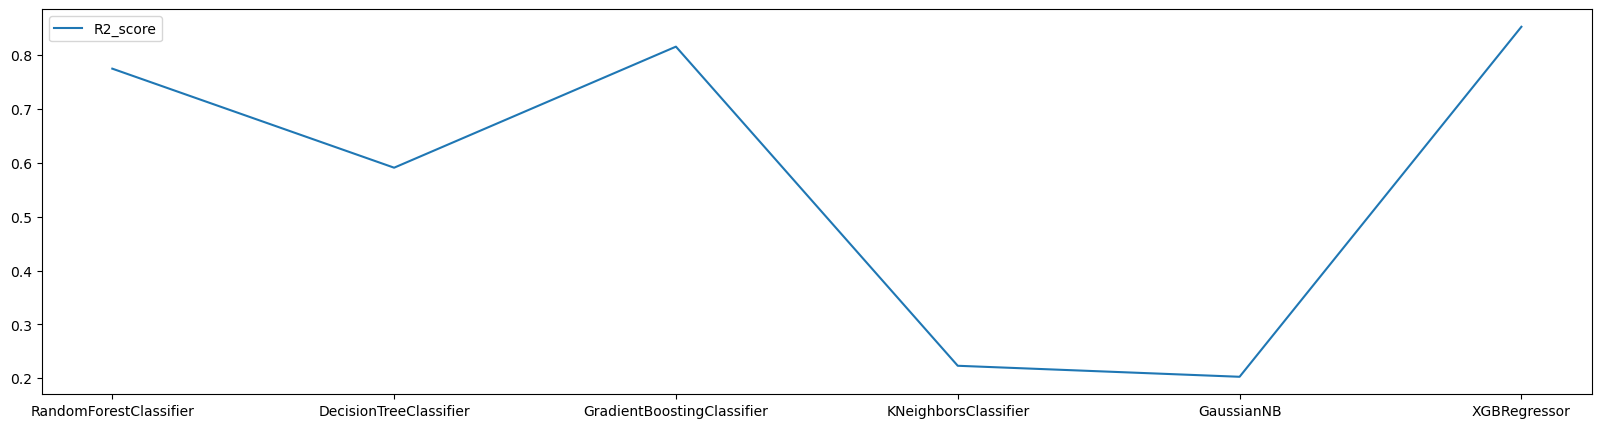

In [175]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.R2_score,label='R2_score')
plt.legend()
plt.show()

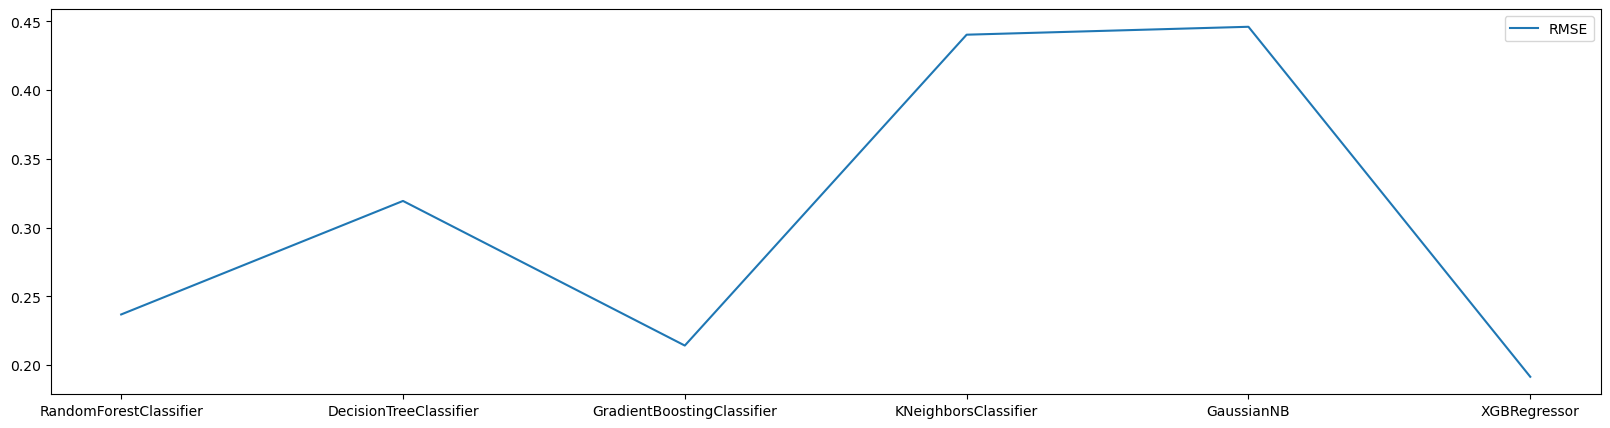

In [179]:
fig,sx=plt.subplots(figsize=(20,5))
plt.plot(df.Algorithm,df.Rmse,label='RMSE')
plt.legend()
plt.show()